<div align="center">
    <h1> Optimization - Gradients </h1>
</div>

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_func(func, x, y, x_start, x_min, trajectory, type=1):
    '''
    Function to plot the contour and the optimization trajectory

    Parameters:
    func - function to optimize
    x_start - starting point
    x_min - minimum point
    trajectory - optimization trajectory
    type - type of contour -> 1 for cmap='viridis' and 2 for 'royalblue square style'
    '''
    arx = plt.figure().add_subplot(projection='3d')
    X, Y = np.meshgrid(x, y)

    if type == 2:
        arx.plot_surface(X, Y, func([X, Y]), edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)
    else:
        arx.contour3D(X, Y, func([X, Y]), 60, cmap='viridis')

    arx.set_xlabel('x')
    arx.set_ylabel('y')
    arx.set_zlabel('f(x, y)')

    
    arx.scatter(x_start[0], x_start[1], func(x_start), color='red')
    arx.scatter(x_min[0], x_min[1], func(x_min), color='black')
    arx.plot(trajectory[:, 0], trajectory[:, 1], func(trajectory.T), color='red')
    plt.show()

In [3]:
#Choose the function which you want to plot

def func(x):
    # Function 1
    #return x[0]**2 + x[1]**2

    # Function 2
    #return np.cos(x[1]) * np.sin(x[0])**2 + 1 / (x[0]**2 + x[1]**2 + 1) - np.cos(x[0])

    # Function 3
    return 0.5*(x[0] - 4.5)**2 + 2.5*(x[1] - 2.3)**2

def func_grad(x):
    #Function 1
    #return np.array([2*x[0], 2*x[1]])

    #Function 2
    #x_grad = -np.sin(x[0]) * np.sin(x[1]) + 2*x[0] / (x[0]**2 + x[1]**2 + 1)**2 + np.sin(x[0])
    #y_grad = np.cos(x[0]) * np.cos(x[1]) + 2*x[1] / (x[0]**2 + x[1]**2 + 1)**2 - np.cos(x[1])
    #return np.array([x_grad, y_grad])

    #Function 3
    return np.array([x[0] - 4.5, 5*(x[1] - 2.3)])

* The method of Gradient Descent

Minimum point: [4.49018165 2.3       ]
Number of steps: 718


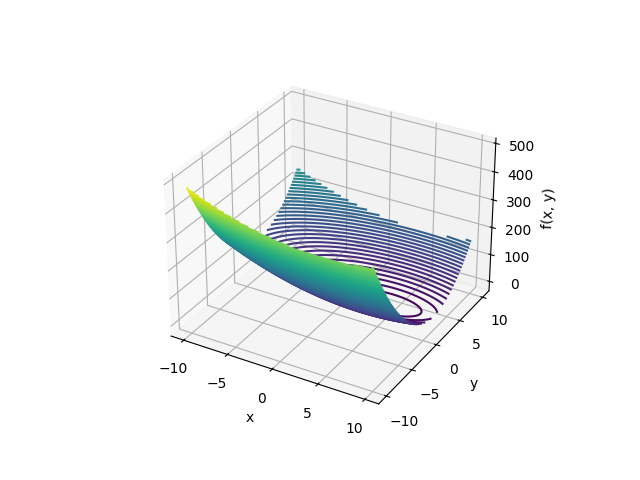

In [15]:
def descent(x, func_gradient, alpha, epsilon, breakpoint='derivative'):
    x_new = np.zeros(x.shape)
    trajectory = np.array([x])
    i = 0

    while True:

        x_new = x - alpha * func_gradient(x)

        if breakpoint == 'gradient':
            if abs(func(x_new)) < epsilon:
                break
        elif breakpoint == 'function':
            if abs(func(x) - func(x_new)) < epsilon:
                break
        elif breakpoint == 'steps':
            if np.linalg.norm(x - x_new) < epsilon:
                break

        # Uncomment to see the steps
        # print('Step:', i, 'x:', x, 'f(x):', func(x))
        
        i += 1
        x = x_new
        trajectory = np.append(trajectory, [x])
    
    return x_new, trajectory.reshape(-1, 2), i

# Starting variables
x_start = np.array([-9, -9])
alpha = 0.01
epsilon = 0.0001
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Calling the function
x_min, trajectory, steps = descent(x_start, func_grad, alpha, epsilon, breakpoint='steps')

print('Minimum point:', x_min)
print('Number of steps:', steps)

# Plot the function
plot_func(func, x, y, x_start, x_min, trajectory, type=1)

* The method of Steepest Descent

- Wolfe Conditions for Line Search
- Armijo Rule

Minimum point: [4.49975864 2.3       ]
Number of steps: 37
Alpha values: [1.   0.25 0.25] ... [0.25 0.25 0.25]


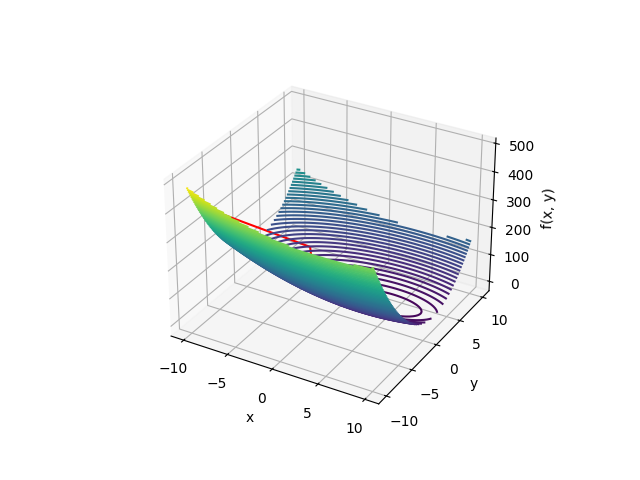

In [16]:
def sufficient_decrease_rule(x_k, alpha, func, func_gradient, c=10**-4, epsilon=10**-6):
    '''
    Backtracking line search using the SDC

    Parameters:
    x_k - current point
    alpha - step size
    func - function to optimize
    func_gradient - gradient of the function
    c - constant (default 10^-4)
    p - constant (default 0.5)
    epsilon - tolerance (default 10^-6)

    Returns:
    aplha - the new step size  
    
    '''
    while func(x_k - alpha * func_gradient(x_k)) > func(x_k) - c * alpha * func_gradient(x_k).T @ func_gradient(x_k):
        alpha /= 2
    
        if alpha < epsilon:
            break

    return alpha

def steepest_descent(x, func_gradient, epsilon, max_iter=10000, breakpoint='derivative'):
    x_new = np.zeros(x.shape)
    trajectory = np.array([x])
    alpha = 1.0
    alpha_values = np.array([alpha])
    i = 0

    while i < max_iter:

        # Calculate the alpha using the Armijo rule
        alpha = sufficient_decrease_rule(x, alpha, func, func_gradient)
        x_new = x - alpha * func_gradient(x)

        # Store the values
        alpha_values = np.append(alpha_values, alpha)
        trajectory = np.append(trajectory, [x], axis=0)

        if breakpoint == 'gradient':
            if abs(func(x_new)) < epsilon:
                break
        elif breakpoint == 'function':
            if abs(func(x) - func(x_new)) < epsilon:
                break
        elif breakpoint == 'steps':
            if np.linalg.norm(x - x_new) < epsilon:
                break

        # Uncomment to see the steps
        # print('Step:', i, 'x:', x, 'f(x):', func(x))
        
        i += 1
        x = x_new     
    
    return x_new, trajectory.reshape(-1, 2), i, alpha_values


'''Starting variables'''
x_start = np.array([-9, -9])
epsilon = 0.0001
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Calling the function
x_min, trajectory, steps, alpha_values = steepest_descent(x_start, func_grad, epsilon, breakpoint='steps')

print('Minimum point:', x_min)
print('Number of steps:', steps)

if alpha_values.size > 10:
    print('Alpha values:', alpha_values[:3], '...', alpha_values[-3:])
else:
    print('Alpha values:', alpha_values)

# Plot the function
plot_func(func, x, y, x_start, x_min, trajectory, type=1)

* Conjugate Direction Method

Alpha: -0.25
Alpha: 2.0
Minimum point: [-1.   1.5]
Number of steps: 2
Trajectory: [[ 0.    0.  ]
 [-0.25  0.  ]
 [-1.    1.5 ]]


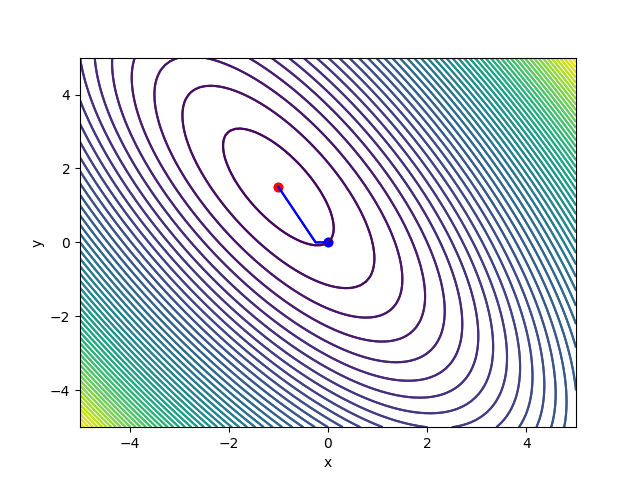

In [5]:
def conjugate_direction(x, Q, beta, epsilon, direction, max_iter=100):
    x_new = np.zeros(x.shape)
    trajectory = np.array([x])
    i = 0

    while i < max_iter:
        p = Q @ x - beta
        alpha = - (p.T @ direction[i]) / (direction[i].T @ Q @ direction[i])

        print('Alpha:', alpha)

        x_new = x + alpha * direction[i]

        if np.linalg.norm(x - x_new) < epsilon:
            break

        i += 1
        x = x_new
        trajectory = np.append(trajectory, [x], axis=0)

    return x_new, trajectory.reshape(-1, 2), i

'''Starting variables'''
x_start = np.array([0, 0])
epsilon = 0.0001
Q = np.array([[4, 2], [2, 2]])
b = np.array([-1, 1])
dir = np.array([[1, 0], [-3/8, 3/4]])
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

def func_matrix_from(x, Q=Q, beta=b):
    return 0.5 * x.T @ Q @ x - x.T @ beta

def func_grad_matrix_form(x, Q=Q, beta=b):
    return Q @ x - beta

# Calling the function
x_min, trajectory, steps = conjugate_direction(x_start, Q, b, epsilon, dir, max_iter=2)

print('Minimum point:', x_min)
print('Number of steps:', steps)
print('Trajectory:', trajectory)

# Plot the function
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = func_matrix_from(np.array([X[i, j], Y[i, j]]))

plt.contour(X, Y, Z, 60, cmap='viridis')
plt.scatter(x_start[0], x_start[1], color='blue')
plt.scatter(x_min[0], x_min[1], color='red')
plt.plot(trajectory[:, 0], trajectory[:, 1], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

* Conjugate Gradient Method

Alpha: 0.20903149874562518
Alpha: 0.9567935990517114
Alpha: nan
Minimum point: [nan nan]
Number of steps: 2
Trajectory: [[-9.         -9.        ]
 [-6.17807477  2.81027968]
 [ 4.5         2.3       ]]


C:\Users\rober\AppData\Local\Temp\ipykernel_19840\3318021004.py:18: RuntimeWarning: invalid value encountered in scalar divide
  alpha = (-1) * (p.T @ d) / (d.T @ Q @ d)


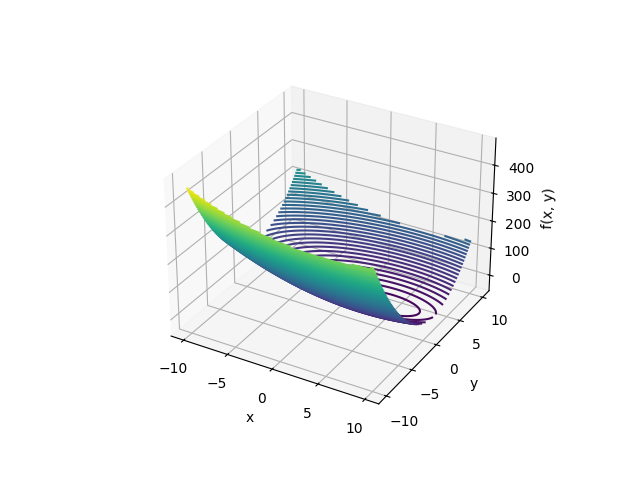

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def conjugate_gradient(x, Q, b, epsilon, max_iter=100):
    x_new = np.zeros(x.shape)
    trajectory = np.array([x])
    i = 0

    while i < max_iter:
        p = Q @ x - b

        if i == 0:
            d = -p
        else:
            beta = (p.T @ Q @ d) / (d.T @ Q @ d)
            d = -p + beta * d

        alpha = (-1) * (p.T @ d) / (d.T @ Q @ d)

        print('Alpha:', alpha)

        x_new = x + alpha * d

        if np.linalg.norm(x - x_new) < epsilon or np.isnan(np.linalg.norm(x - x_new)):
            break

        i += 1
        x = x_new
        trajectory = np.append(trajectory, [x], axis=0)

    return x_new, trajectory.reshape(-1, 2), i

'''Starting variables'''
x_start = np.array([-9, -9])
epsilon = 0.0001
Q = np.array([[1, 0], [0, 5]])
b = np.array([4.5, 11.5])
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

def func_matrix_from(x, Q=Q, b=b):
    return 0.5 * x.T @ Q @ x - b.T @ x

def func_grad_matrix_form(x, Q=Q, b=b):
    return Q @ x - b

# Calling the function
x_min, trajectory, steps = conjugate_gradient(x_start, Q, b, epsilon, max_iter=5)

print('Minimum point:', x_min)
print('Number of steps:', steps)
print('Trajectory:', trajectory)

# Plot the function
arx = plt.figure().add_subplot(projection='3d')
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = func_matrix_from(np.array([X[i, j], Y[i, j]]))

arx.contour3D(X, Y, Z, 60, cmap='viridis')

arx.set_xlabel('x')
arx.set_ylabel('y')
arx.set_zlabel('f(x, y)')

# Check if the minimum point is nan
if np.isnan(x_min).any():
    x_min = trajectory[-1]
    
arx.scatter(x_start[0], x_start[1], func_matrix_from(x_start), color='red')
arx.scatter(x_min[0], x_min[1], func_matrix_from(x_min), color='black')

z_trajectory = [func_matrix_from(x) for x in trajectory]
arx.plot(trajectory[:, 0], trajectory[:, 1], z_trajectory, color='red')

plt.show()

* Stochastic Gradient Descent
* Gradient Descent with Momentum
* Nesterov Accelerated Gradient
* Backpropagation
* Newton's Method
* Adam Optimization
* Simplex Method
* Mini-batch Gradient Descent
* Batch Gradient Descent

In [ ]:
def stochastic_gradient_descent():
    pass